1.Defining the problem statement

To analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and various other factors to help the business make better decisions.

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
path = "/content/drive/MyDrive/Business_case_datasets/walmart_data.csv"
df = pd.read_csv(path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Getting the type of data in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
len(df)

550068

In [ ]:
df.shape

(550068, 10)

In [ ]:
#getting list of all columns present in the df
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

2.Detect Null values & Outliers

In [ ]:
#gives us the count of unique records in the dataframe
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
#checking how many null values are present in each column in the data
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

This means that the data given is clean since no null values are present

In [ ]:
columns=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df[columns]=df[columns].astype('object')

In [ ]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


There are 5891 unique users, and customer with userid 1001680 has highest count of products purchased.

Marital status unmarried contribute more in terms of the count for the purchase.

There are 20 unique product categories with 5 being the highest.

We can see that males contribute to 75% of the total sales and females about 24.6%

Married people buy less number of products than married.(41%<59%)


In [ ]:
#Checking how the data is spread across age bins
df2=df.groupby(['User_ID'])['Age'].unique()
df2.head()

User_ID
1000001     [0-17]
1000002      [55+]
1000003    [26-35]
1000004    [46-50]
1000005    [26-35]
Name: Age, dtype: object

In [ ]:
df2=df.groupby(['User_ID'])['Gender'].unique()
df2.value_counts()/len(df2)

In [ ]:
# Checking how categorical variables contributes to the entire data
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

[M]    0.717196

[F]    0.282804

Name: Gender, dtype: float64

In [ ]:
#shows us the ID of customer who bought the most items
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
#gives us which product category is most bought
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
#shows us that people who are non married(assuming 1 as married and 0 as non married) buy more number of products
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
#tells us that males buy more from Walmart than females
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
#shows that 26-35 age group buy the most and 0-17 the least
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

There are no missing values in the data.

There are 3631 unique product IDs in the dataset. P00265242 is the most sold Product ID.

There are 7 unique age groups and most of the purchase belongs to age 26-35 group.

There are 3 unique city categories with category B being the highest.

Minimum & Maximum purchase is 12 and 23961 suggests the purchasing behaviour is quite spread over a aignificant range of values. Mean is 9264 and 75% of purchase is of less than or equal to 12054. It suggest most of the purchase is not more than 12k.

Few categorical variable are of integer data type. It can be converted to character type.

Out of 550068 data points, 414259's gender is Male and rest are the female. Male purchase count is much higher than female.

Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.

In [ ]:
#Checking the age group distribution in different city categories
pd.crosstab(index=df["City_Category"],columns=df["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


In [ ]:
#Walmart is most popular among the given city categories
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df.index = np.arange(1,df.shape[0]+1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
1,1000001,P00069042,F,0-17,10,A,2,0,3,8370
2,1000001,P00248942,F,0-17,10,A,2,0,1,15200
3,1000001,P00087842,F,0-17,10,A,2,0,12,1422
4,1000001,P00085442,F,0-17,10,A,2,0,12,1057
5,1000002,P00285442,M,55+,16,C,4+,0,8,7969


LET'S DO SOME ANALYSIS ON SAMPLE DATA

In [ ]:
df_male = df[df['Gender']=='M']
df_male.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5,1000002,P00285442,M,55+,16,C,4+,0,8,7969
6,1000003,P00193542,M,26-35,15,A,3,0,1,15227
7,1000004,P00184942,M,46-50,7,B,2,1,1,19215
8,1000004,P00346142,M,46-50,7,B,2,1,1,15854
9,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [ ]:
df_female = df.loc[df['Gender']=='F']
df_female.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
1,1000001,P00069042,F,0-17,10,A,2,0,3,8370
2,1000001,P00248942,F,0-17,10,A,2,0,1,15200
3,1000001,P00087842,F,0-17,10,A,2,0,12,1422
4,1000001,P00085442,F,0-17,10,A,2,0,12,1057
15,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [ ]:
df_male['Purchase'].mean()

9437.526040472265

In [ ]:
df_female['Purchase'].mean()

8734.565765155476

We can see that mean purchase amount of males is greater than females

In [ ]:
df_married = df.loc[df['Marital_Status']==1]
df_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
7,1000004,P00184942,M,46-50,7,B,2,1,1,19215
8,1000004,P00346142,M,46-50,7,B,2,1,1,15854
9,1000004,P0097242,M,46-50,7,B,2,1,1,15686
10,1000005,P00274942,M,26-35,20,A,1,1,8,7871
11,1000005,P00251242,M,26-35,20,A,1,1,5,5254


In [ ]:
df_unmarried = df.loc[df['Marital_Status']==0]
df_unmarried.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
1,1000001,P00069042,F,0-17,10,A,2,0,3,8370
2,1000001,P00248942,F,0-17,10,A,2,0,1,15200
3,1000001,P00087842,F,0-17,10,A,2,0,12,1422
4,1000001,P00085442,F,0-17,10,A,2,0,12,1057
5,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_married['Purchase'].mean()

9261.174574082374

In [ ]:
df_unmarried['Purchase'].mean()

9265.907618921507

though unmarried buy more number of products , the mean of purchase amount made is almost very close to equal

Univariate analysis on above dataframes
Note:Grouping of data based on usedid has been done in the later stages.The below few plots are shown as individual transactions

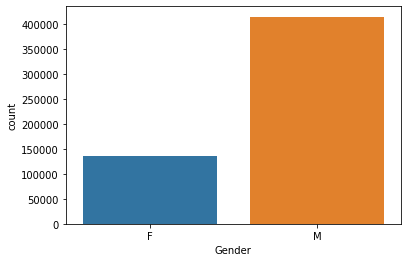

In [ ]:
sns.countplot(x=df['Gender'])
#plot shows that male consumers are greater than female

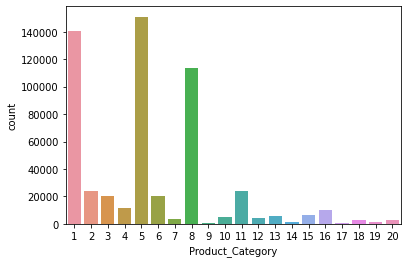

In [ ]:
sns.countplot(x=df['Product_Category'])
#gives us the count of which product category is sold the most(5 in this case) and which the least

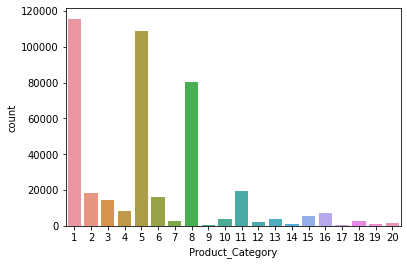

In [ ]:
sns.countplot(x=df_male['Product_Category'])
#gives us the count of which product category is sold the most(1 in this case) and which the least but for males only

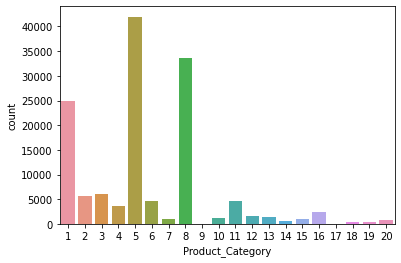

In [ ]:
sns.countplot(x=df_female['Product_Category'])
#gives us the count of which product category is sold the most(5 in this case) and which the least but for females only

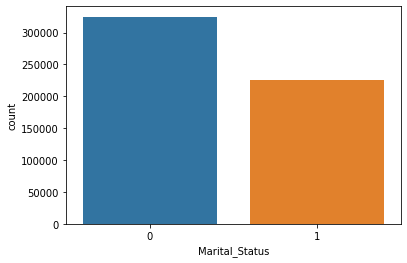

In [ ]:
sns.countplot(x=df['Marital_Status'])
#number of products sold who are married vs un married

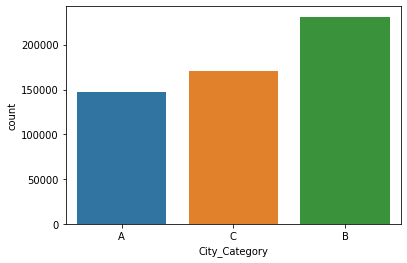

In [ ]:
sns.countplot(x=df['City_Category'])
#shows which city sells the most products

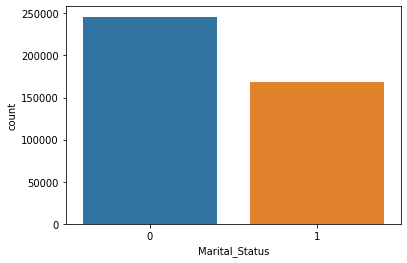

In [ ]:
sns.countplot(x=df_male['Marital_Status'])
#number of products sold who are married vs un married but for males only

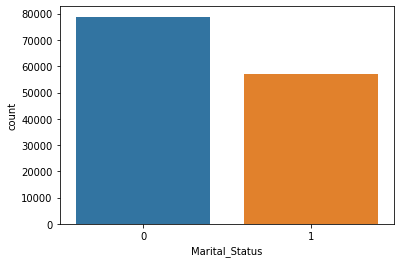

In [ ]:
sns.countplot(x=df_female['Marital_Status'])
#number of products sold who are married vs un married but for females only


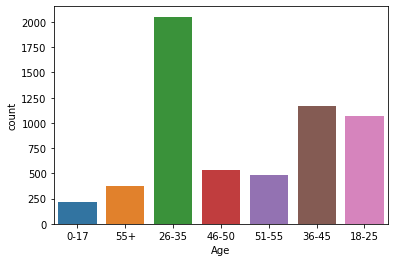

In [ ]:
sns.countplot(x=df_age['Age'])
#here product count is binned as per the age groups

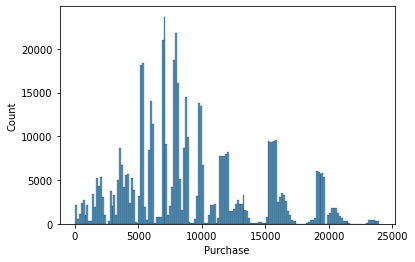

In [ ]:
sns.histplot(x=df["Purchase"])
#hist plot below shows the distribution of counts of products vs purchase amounts

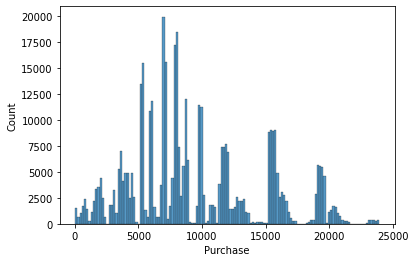

In [ ]:
sns.histplot(x=df_male["Purchase"])
#hist plot below shows the distribution of counts of products vs purchase amounts but for males

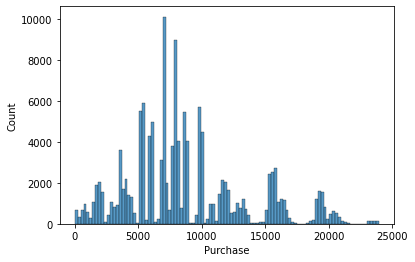

In [ ]:
sns.histplot(x=df_female["Purchase"])
#hist plot below shows the distribution of counts of products vs purchase amounts but for females

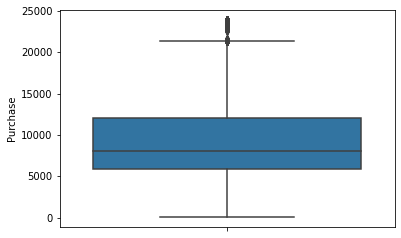

In [ ]:
sns.boxplot(y=df['Purchase'])
#outlier detection for purchases

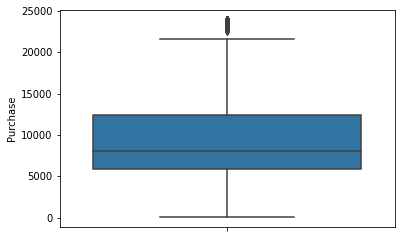

In [ ]:
sns.boxplot(y=df_male['Purchase'])
#outlier detection for purchases done by males

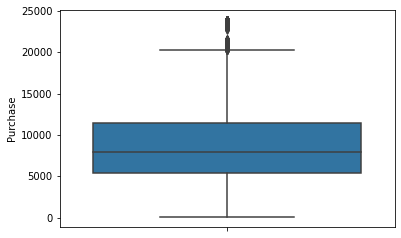

In [ ]:
sns.boxplot(y=df_female['Purchase'])
#outlier detection for purchases done by females

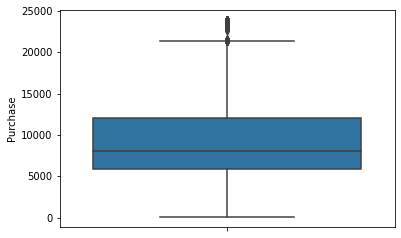

In [ ]:
sns.boxplot(y=df_married['Purchase'])
#outlier detection for purchases done by married consumers

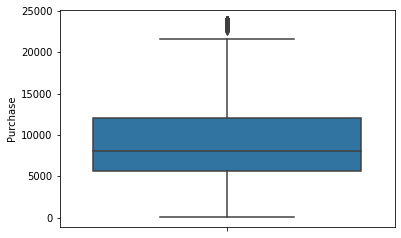

In [ ]:
sns.boxplot(y=df_unmarried['Purchase'])
#outlier detection for purchases done by unmarried consumers

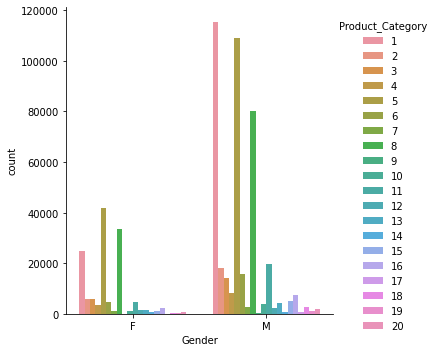

In [ ]:
sns.catplot(x ="Gender", hue ="Product_Category", kind ="count", data = df)
#category plot for different product categories and genders

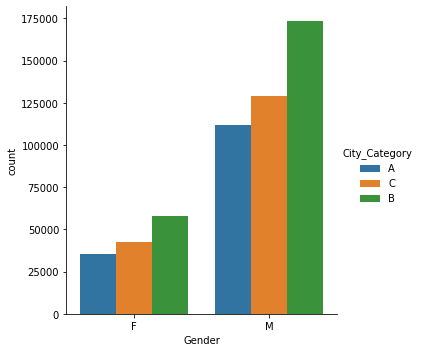

In [ ]:
sns.catplot(x ="Gender", hue ="City_Category", kind ="count", data = df)
#category plot for different cities and genders

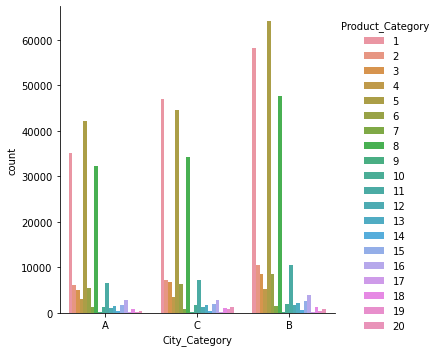

In [ ]:
sns.catplot(x ="City_Category", hue ="Product_Category", kind ="count", data = df)
#category plot for different product categories and cities

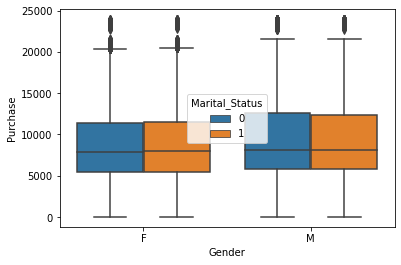

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df, hue='Marital_Status')
#box plot for purchase amount and genders who are married vs unmarried

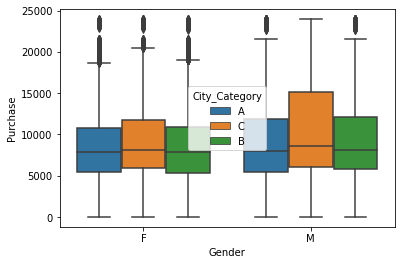

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df, hue='City_Category')
#box plot for purchase amount and genders who are in different cities

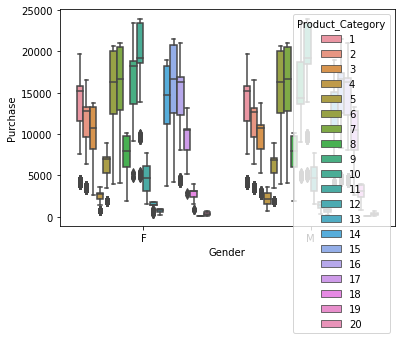

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df, hue='Product_Category')

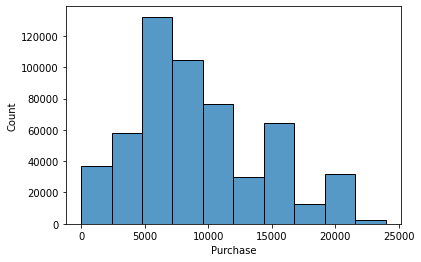

In [ ]:
sns.histplot(df["Purchase"],bins=10)

In [ ]:
df.corr()
#gives the correlation between two numerical variables

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


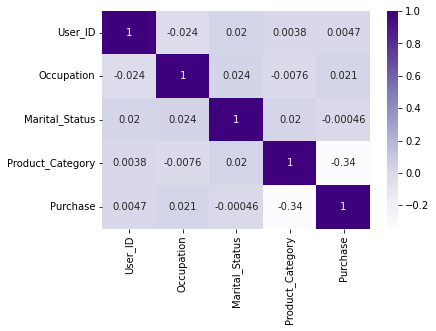

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="Purples")

4.

1.Are women spending more money per transaction than men? Why or Why not? (10 Points)

Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)

Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)

Results when the same activity is performed for Married vs Unmarried (10 Points)

Results when the same activity is performed for Age (10 Points)

In [ ]:
#From the sample dataset--we can calculate money spent per transaction by women on average as
df_female['Purchase'].sum()/len(df_female)

8734.565765155476

In [ ]:
#From the sample dataset--we can calculate money spent per transaction by men on average as
df_male['Purchase'].sum()/len(df_male)

9437.526040472265

We can see that men spend more money per transaction than women

In [ ]:
avgamt_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].mean()
avgamt_gender = avgamt_gender.reset_index()
avgamt_gender

,User_ID,Gender,Purchase
0,1000001,F,9545.514286
1,1000002,M,10525.610390
2,1000003,M,11780.517241
3,1000004,M,14747.714286
4,1000005,M,7745.292453
...,...,...,...
5886,1006036,F,8007.894942
5887,1006037,F,9176.540984
5888,1006038,F,7502.833333
5889,1006039,F,7977.283784


In [ ]:
avgamt_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,8965.198464
M,9806.867524


Let's apply bootstrapping method to calculate the confidence level intervals

In [ ]:
df_male['User_ID'].nunique()

4225

In [ ]:
df_female['User_ID'].nunique()

1666

In [ ]:
df_final = df.groupby(['User_ID','Gender'])[['Purchase']].mean()
df_final = df_final.reset_index()
df_final.head(6)

,User_ID,Gender,Purchase
0,1000001,F,9545.514286
1,1000002,M,10525.610390
2,1000003,M,11780.517241
3,1000004,M,14747.714286
4,1000005,M,7745.292453
5,1000006,F,8083.617021


In [ ]:
df_mfinal = df_final.loc[df_final['Gender']=='M']
df_mfinal.head()

,User_ID,Gender,Purchase
1,1000002,M,10525.610390
2,1000003,M,11780.517241
3,1000004,M,14747.714286
4,1000005,M,7745.292453
6,1000007,M,13804.000000


In [ ]:
df_ffinal = df_final.loc[df_final['Gender']=='F']
df_ffinal.head()

,User_ID,Gender,Purchase
0,1000001,F,9545.514286
5,1000006,F,8083.617021
9,1000010,F,9728.744395
10,1000011,F,7957.471429
15,1000016,F,6840.454545


In [ ]:
msize = df_male['User_ID'].nunique()
msize

4225

In [ ]:
fsize = len(df_ffinal)
fsize

1666

In [ ]:
msize = df_male['User_ID'].nunique()
bootstrapped_malepurchasesamples = np.random.choice(df_mfinal['Purchase'],size=msize)
round(np.mean(bootstrapped_malepurchasesamples),2)

9805.22

Obtaining histplot(sample size=10000) for avg purchase amount for males

In [ ]:
bootstrapped_msurvey=[]
for reps in np.arange(10000):
  bootstrapped_malepurchasesamples = np.random.choice(df_mfinal['Purchase'],size=msize)
  bootstrapped_mmean = round(np.mean(bootstrapped_malepurchasesamples),2)
  bootstrapped_msurvey.append(bootstrapped_mmean)

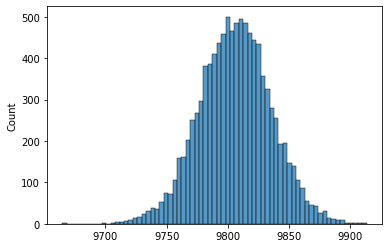

In [ ]:
sns.histplot(bootstrapped_msurvey)

In [ ]:
left = np.percentile(bootstrapped_msurvey,10)
right = np.percentile(bootstrapped_msurvey,90)
print(f"With 90% confidence , we can say that male customer spends somewhere between {left} and {right} on average")

With 90% confidence , we can say that male customer spends somewhere between 9768.86 and 9843.42 on average


In [ ]:
left = np.percentile(bootstrapped_msurvey,2.5)
right = np.percentile(bootstrapped_msurvey,97.5)
print(f"With 95% confidence , we can say that male customer spends somewhere between {left} and {right} on average")

With 95% confidence , we can say that male customer spends somewhere between 9748.71475 and 9863.00075 on average


In [ ]:
left = np.percentile(bootstrapped_msurvey,1)
right = np.percentile(bootstrapped_msurvey,99)
print(f"With 99% confidence , we can say that male customer spends somewhere between {left} and {right} on average")

With 99% confidence , we can say that male customer spends somewhere between 9735.2693 and 9875.1116 on average


Finding the distribution(sample size=10000) for avg purchase amount for females

In [ ]:
fsize = len(df_ffinal)
bootstrapped_femalepurchasesamples = np.random.choice(df_female['Purchase'],size=fsize)
round(np.mean(bootstrapped_femalepurchasesamples),2)

8710.02

In [ ]:
bootstrapped_fsurvey=[]
for reps in np.arange(10000):
  bootstrapped_femalepurchasesamples = np.random.choice(df_ffinal['Purchase'],size=fsize)
  bootstrapped_fmean = round(np.mean(bootstrapped_femalepurchasesamples),2)
  bootstrapped_fsurvey.append(bootstrapped_fmean)

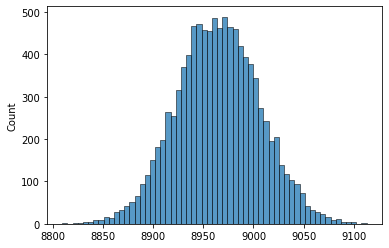

In [ ]:
sns.histplot(bootstrapped_fsurvey)

In [ ]:
left = np.percentile(bootstrapped_fsurvey,10)
right = np.percentile(bootstrapped_fsurvey,90)
print(f"With 90% confidence , we can say that female customer spends somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_fsurvey,2.5)
right = np.percentile(bootstrapped_fsurvey,97.5)
print(f"With 95% confidence , we can say that female customer spends somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_fsurvey,1)
right = np.percentile(bootstrapped_fsurvey,99)
print(f"With 99% confidence , we can say that female customer spends somewhere between {left} and {right} on average")


With 90% confidence , we can say that frmale customer spends somewhere between 8911.759 and 9017.701000000001 on average
With 95% confidence , we can say that frmale customer spends somewhere between 8883.988 and 9046.212 on average
With 99% confidence , we can say that female customer spends somewhere between 8867.9091 and 9061.9531 on average


In [ ]:
df_marriedfinal = df_married.groupby(['User_ID','Gender'])['Purchase'].mean()
df_marriedfinal=df_marriedfinal.reset_index()
df_marriedfinal.head()

,User_ID,Gender,Purchase
0,1000004,M,14747.714286
1,1000005,M,7745.292453
2,1000007,M,13804.000000
3,1000008,M,10345.363636
4,1000010,F,9728.744395


3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.Some sort of extra discount can be introduced only to female customers and female product categories.
Walmart can have stores exclusive to female customers or introduce some sort of flash sales to target the female gender.

Obtaining histplot(sample size=1000000) for avg purchase amount for married category

In [ ]:
bootstrapped_marriedsurvey=[]
for reps in np.arange(1000000):
  bootstrapped_marriedsample= np.random.choice(df_marriedfinal['Purchase'],size=len(df_marriedfinal))
  bootstrapped_marriedmean=round(np.mean(bootstrapped_marriedsample),2)
  bootstrapped_marriedsurvey.append(bootstrapped_marriedmean)

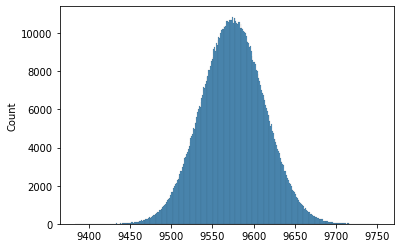

In [ ]:
sns.histplot(bootstrapped_marriedsurvey)

In [ ]:
left = np.percentile(bootstrapped_marriedsurvey,10)
right = np.percentile(bootstrapped_marriedsurvey,90)
print(f"With 90% confidence , we can say that married customer spends somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_marriedsurvey,2.5)
right = np.percentile(bootstrapped_marriedsurvey,97.5)
print(f"With 95% confidence , we can say that married customer spends somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_marriedsurvey,1)
right = np.percentile(bootstrapped_marriedsurvey,99)
print(f"With 99% confidence , we can say that married customer spends somewhere between {left} and {right} on average")

With 90% confidence , we can say that married customer spends somewhere between 9525.86 and 9624.31 on average
With 95% confidence , we can say that married customer spends somewhere between 9500.12 and 9650.55 on average
With 99% confidence , we can say that married customer spends somewhere between 9485.95 and 9664.82 on average


In [ ]:
df_unmarriedfinal = df_unmarried.groupby(['User_ID','Gender'])['Purchase'].mean()
df_unmarriedfinal = df_unmarriedfinal.reset_index()
df_unmarriedfinal.head()

,User_ID,Gender,Purchase
0,1000001,F,9545.514286
1,1000002,M,10525.610390
2,1000003,M,11780.517241
3,1000006,F,8083.617021
4,1000009,M,10243.086207


In [ ]:
bootstrapped_unmarriedsurvey=[]
for reps in np.arange(1000000):
  bootstrapped_unmarriedsample= np.random.choice(df_unmarriedfinal['Purchase'],size=len(df_unmarriedfinal))
  bootstrapped_unmarriedmean=round(np.mean(bootstrapped_unmarriedsample),2)
  bootstrapped_unmarriedsurvey.append(bootstrapped_unmarriedmean)

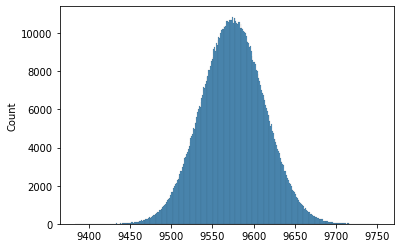

In [ ]:
sns.histplot(bootstrapped_marriedsurvey)

In [ ]:
left = np.percentile(bootstrapped_unmarriedsurvey,10)
right = np.percentile(bootstrapped_unmarriedsurvey,90)
print(f"With 90% confidence , we can say that un-married customer spends somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_unmarriedsurvey,2.5)
right = np.percentile(bootstrapped_unmarriedsurvey,97.5)
print(f"With 95% confidence , we can say that un-married customer spends somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_unmarriedsurvey,1)
right = np.percentile(bootstrapped_unmarriedsurvey,99)
print(f"With 99% confidence , we can say that un-married customer spends somewhere between {left} and {right} on average")

With 90% confidence , we can say that un-married customer spends somewhere between 9523.23 and 9605.56 on average
With 95% confidence , we can say that un-married customer spends somewhere between 9501.669750000001 and 9627.47 on average
With 99% confidence , we can say that un-married customer spends somewhere between 9489.85 and 9639.31 on average


Obtaining histplot(sample size=1000) for avg purchase amount for age bins using bootstrapping

In [ ]:
df_age = df.groupby(['User_ID','Age'])['Purchase'].mean()
df_age = df_age.reset_index()
df_age.head()

,User_ID,Age,Purchase
0,1000001,0-17,9545.514286
1,1000002,55+,10525.610390
2,1000003,26-35,11780.517241
3,1000004,46-50,14747.714286
4,1000005,26-35,7745.292453


In [ ]:
df_age1 = df_age.loc[df_age['Age']=='0-17']
df_age2 = df_age.loc[df_age['Age']=='18-25']
df_age3 = df_age.loc[df_age['Age']=='26-35']
df_age4 = df_age.loc[df_age['Age']=='36-45']
df_age5 = df_age.loc[df_age['Age']=='46-50']
df_age6 = df_age.loc[df_age['Age']=='51-55']
df_age7 = df_age.loc[df_age['Age']=='55+']

In [ ]:
bootstrapped_agesurvey1=[]
for reps in np.arange(1000):
  bootstrapped_agesample1= np.random.choice(df_age1['Purchase'],size=len(df_age1))
  bootstrapped_agemean1=round(np.mean(bootstrapped_agesample1),2)
  bootstrapped_agesurvey1.append(bootstrapped_agemean1)

bootstrapped_agesurvey2=[]
for reps in np.arange(1000):
  bootstrapped_agesample2= np.random.choice(df_age2['Purchase'],size=len(df_age2))
  bootstrapped_agemean2=round(np.mean(bootstrapped_agesample2),2)
  bootstrapped_agesurvey2.append(bootstrapped_agemean2)

bootstrapped_agesurvey3=[]
for reps in np.arange(1000):
  bootstrapped_agesample3= np.random.choice(df_age3['Purchase'],size=len(df_age3))
  bootstrapped_agemean3=round(np.mean(bootstrapped_agesample3),2)
  bootstrapped_agesurvey3.append(bootstrapped_agemean3)

bootstrapped_agesurvey4=[]
for reps in np.arange(1000):
  bootstrapped_agesample4= np.random.choice(df_age4['Purchase'],size=len(df_age4))
  bootstrapped_agemean4=round(np.mean(bootstrapped_agesample4),2)
  bootstrapped_agesurvey4.append(bootstrapped_agemean4)

bootstrapped_agesurvey5=[]
for reps in np.arange(1000):
  bootstrapped_agesample5= np.random.choice(df_age5['Purchase'],size=len(df_age5))
  bootstrapped_agemean5=round(np.mean(bootstrapped_agesample5),2)
  bootstrapped_agesurvey5.append(bootstrapped_agemean5)

bootstrapped_agesurvey6=[]
for reps in np.arange(1000):
  bootstrapped_agesample6= np.random.choice(df_age6['Purchase'],size=len(df_age6))
  bootstrapped_agemean6=round(np.mean(bootstrapped_agesample6),2)
  bootstrapped_agesurvey6.append(bootstrapped_agemean6)

bootstrapped_agesurvey7=[]
for reps in np.arange(1000):
  bootstrapped_agesample7= np.random.choice(df_age7['Purchase'],size=len(df_age7))
  bootstrapped_agemean7=round(np.mean(bootstrapped_agesample7),2)
  bootstrapped_agesurvey7.append(bootstrapped_agemean7)


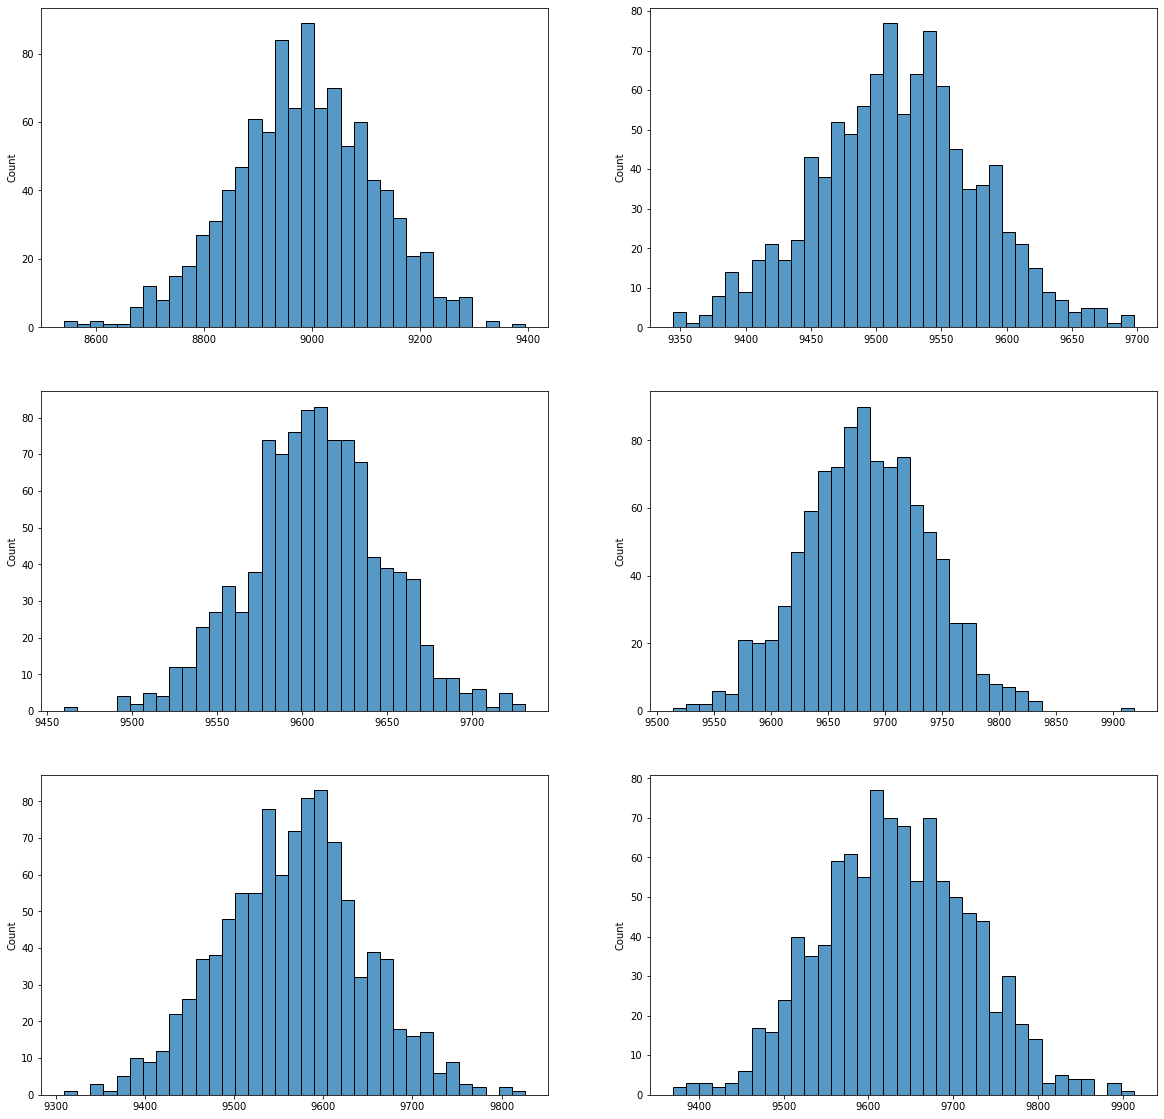

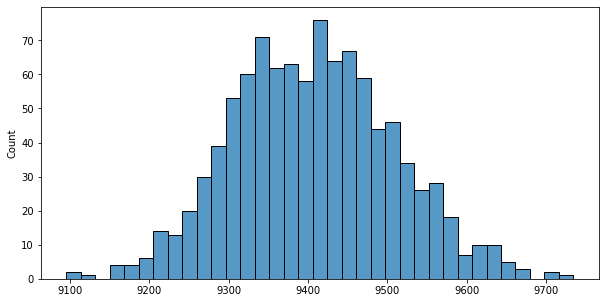

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
sns.histplot(bootstrapped_agesurvey1,bins=35,ax=axis[0,0])
sns.histplot(bootstrapped_agesurvey2,bins=35,ax=axis[0,1])
sns.histplot(bootstrapped_agesurvey3,bins=35,ax=axis[1,0])
sns.histplot(bootstrapped_agesurvey4,bins=35,ax=axis[1,1])
sns.histplot(bootstrapped_agesurvey5,bins=35,ax=axis[2,0])
sns.histplot(bootstrapped_agesurvey6,bins=35,ax=axis[2,1])
plt.figure(figsize=(10, 5))
sns.histplot(bootstrapped_agesurvey7,bins=35)
plt.show()

In [ ]:
left = np.percentile(bootstrapped_agesurvey1,10)
right = np.percentile(bootstrapped_agesurvey1,90)
print(f"With 90% confidence , we can say that for customer between age  0-17 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey1,2.5)
right = np.percentile(bootstrapped_agesurvey1,97.5)
print(f"With 95% confidence , we can say that for customer between age  0-17 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey1,1)
right = np.percentile(bootstrapped_agesurvey1,99)
print(f"With 99% confidence ,we can say that for customer between age  0-17 spend somewhere between {left} and {right} on average")



With 90% confidence , we can say that for customer between age  0-17 spend somewhere between 8816.583 and 9152.382 on average
With 95% confidence , we can say that for customer between age  0-17 spend somewhere between 8716.422 and 9237.8915 on average
With 99% confidence ,we can say that for customer between age  0-17 spend somewhere between 8679.3037 and 9277.7737 on average


In [ ]:
left = np.percentile(bootstrapped_agesurvey2,10)
right = np.percentile(bootstrapped_agesurvey2,90)
print(f"With 90% confidence , we can say that for customer between age  18-25 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey2,2.5)
right = np.percentile(bootstrapped_agesurvey2,97.5)
print(f"With 95% confidence , we can say that for customer between age 18-25 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey2,1)
right = np.percentile(bootstrapped_agesurvey2,99)
print(f"With 99% confidence ,we can say that for customer between age  18-25 spend somewhere between {left} and {right} on average")


With 90% confidence , we can say that for customer between age  18-25 spend somewhere between 9436.836 and 9594.699999999999 on average
With 95% confidence , we can say that for customer between age 18-25 spend somewhere between 9389.525500000002 and 9634.8215 on average
With 99% confidence ,we can say that for customer between age  18-25 spend somewhere between 9381.0989 and 9665.3242 on average


In [ ]:
left = np.percentile(bootstrapped_agesurvey3,10)
right = np.percentile(bootstrapped_agesurvey3,90)
print(f"With 90% confidence , we can say that for customer between age  26-35 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey3,2.5)
right = np.percentile(bootstrapped_agesurvey3,97.5)
print(f"With 95% confidence , we can say that for customer between age 26-35 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey3,1)
right = np.percentile(bootstrapped_agesurvey3,99)
print(f"With 99% confidence ,we can say that for customer between age  26-35 spend somewhere between {left} and {right} on average")

With 90% confidence , we can say that for customer between age  26-35 spend somewhere between 9554.847000000002 and 9660.081 on average
With 95% confidence , we can say that for customer between age 26-35 spend somewhere between 9527.412750000001 and 9686.3955 on average
With 99% confidence ,we can say that for customer between age  26-35 spend somewhere between 9511.3503 and 9705.6656 on average


In [ ]:
left = np.percentile(bootstrapped_agesurvey4,10)
right = np.percentile(bootstrapped_agesurvey4,90)
print(f"With 90% confidence , we can say that for customer between age  36-45 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey4,2.5)
right = np.percentile(bootstrapped_agesurvey4,97.5)
print(f"With 95% confidence , we can say that for customer between age 36-45 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey4,1)
right = np.percentile(bootstrapped_agesurvey4,99)
print(f"With 99% confidence ,we can say that for customer between age  36-45 spend somewhere between {left} and {right} on average")

With 90% confidence , we can say that for customer between age  36-45 spend somewhere between 9614.19 and 9753.824 on average
With 95% confidence , we can say that for customer between age 36-45 spend somewhere between 9578.83875 and 9791.2045 on average
With 99% confidence ,we can say that for customer between age  36-45 spend somewhere between 9559.7425 and 9812.653600000001 on average


In [ ]:
left = np.percentile(bootstrapped_agesurvey5,10)
right = np.percentile(bootstrapped_agesurvey5,90)
print(f"With 90% confidence , we can say that for customer between age  46-50 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey5,2.5)
right = np.percentile(bootstrapped_agesurvey5,97.5)
print(f"With 95% confidence , we can say that for customer between age 46-50 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey5,1)
right = np.percentile(bootstrapped_agesurvey5,99)
print(f"With 99% confidence ,we can say that for customer between age  46-50 spend somewhere between {left} and {right} on average")

With 90% confidence , we can say that for customer between age  46-50 spend somewhere between 9462.628 and 9667.106 on average
With 95% confidence , we can say that for customer between age 46-50 spend somewhere between 9409.0035 and 9718.66175 on average
With 99% confidence ,we can say that for customer between age  46-50 spend somewhere between 9387.8953 and 9745.223999999998 on average


In [ ]:
left = np.percentile(bootstrapped_agesurvey6,10)
right = np.percentile(bootstrapped_agesurvey6,90)
print(f"With 90% confidence , we can say that for customer between age  51-55 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey6,2.5)
right = np.percentile(bootstrapped_agesurvey6,97.5)
print(f"With 95% confidence , we can say that for customer between age 51-55 spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey6,1)
right = np.percentile(bootstrapped_agesurvey6,99)
print(f"With 99% confidence ,we can say that for customer between age  51-55 spend somewhere between {left} and {right} on average")

With 90% confidence , we can say that for customer between age  51-55 spend somewhere between 9519.18 and 9744.902 on average
With 95% confidence , we can say that for customer between age 51-55 spend somewhere between 9468.768250000001 and 9801.16 on average
With 99% confidence ,we can say that for customer between age  51-55 spend somewhere between 9431.2326 and 9837.150099999999 on average


In [ ]:
left = np.percentile(bootstrapped_agesurvey7,10)
right = np.percentile(bootstrapped_agesurvey7,90)
print(f"With 90% confidence , we can say that for customer between age 55+ spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey7,2.5)
right = np.percentile(bootstrapped_agesurvey7,97.5)
print(f"With 95% confidence , we can say that for customer between age 55+ spend somewhere between {left} and {right} on average")

left = np.percentile(bootstrapped_agesurvey7,1)
right = np.percentile(bootstrapped_agesurvey7,99)
print(f"With 99% confidence ,we can say that for customer between age  55+ spend somewhere between {left} and {right} on average")

With 90% confidence , we can say that for customer between age 55+ spend somewhere between 9280.57 and 9540.052000000001 on average
With 95% confidence , we can say that for customer between age 55+ spend somewhere between 9216.274249999999 and 9616.867 on average
With 99% confidence ,we can say that for customer between age  55+ spend somewhere between 9186.217700000001 and 9648.3691 on average


Final insights

It can be said that male customers buy more or rather spend more than females
This will hold good for the entire population.

The age group 26-35 will buy the most number of products and city B overall will have most number of sales from Walmart.

(Comments for each univariate and bivariate plots are given under their respective plots)

Married consumers buy lesser number of products when compared to unmarried and this too is applicable to the entire population.

RECOMMENDATIONS

1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.

2. Product_Category - 1, 5, 8 have highest purchasing frequency. It means these are the product categories are more in demand. Company can focus on selling more of these products.

3. Unmarried customers spend more money than married customers, so company can invest some resorces in order to target married customers

4. Customers in the age 26-35 spend more money than the others.Other type of offers can be rolled out for consumers in other age brackets.

5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.

6. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it or increasing sales of these by introducing flash sales.

7. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for company'sbusiness.

8. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

9. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

10. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

11. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.